In [1]:
import torch
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import random
import os
root="../own_dataset/test/"

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# -----------------ready the dataset--------------------------
def default_loader(path):
    return Image.open(path).convert("L")
class MyDataset(Dataset):
    def __init__(self, txt, crop_size,crop_num, transform=None, target_transform=None, loader=default_loader):
        lines = os.listdir(root)
        imgs = []
        new_lines = []
        for i, line in enumerate(lines):
            if 'pred' in line:
                continue
            imgs.append(root+line)
            new_lines.append(line)
            
        self.imgs = imgs
        self.names = new_lines
        self.loader = loader
        self.transform = transform

    def __getitem__(self, index):
        fn = self.imgs[index]
        img = self.loader(fn)
        name = self.names[index]
        if self.transform is not None:
            img = self.transform(img)
                  
        return img,name

    def __len__(self):
        return len(self.imgs)

In [3]:
#-----------------create the Net and training------------------------

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.downconv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 48, 5, 2, 2),
            torch.nn.BatchNorm2d(48),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(48, 128, 3, 1, 1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(128, 128, 3, 1, 1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
        )
        self.downconv2 = torch.nn.Sequential(
            torch.nn.Conv2d(128,256, 3, 2, 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(256, 256, 3, 1, 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(256, 256, 3, 1, 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
        )
        self.downconv3 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 256, 3, 2, 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(256, 512, 3, 1, 1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(512, 1024, 3, 1, 1),
            torch.nn.BatchNorm2d(1024),
            torch.nn.ReLU(),
        )
        self.flat = torch.nn.Sequential(
            torch.nn.Conv2d(1024, 1024, 3, 1, 1),
            torch.nn.BatchNorm2d(1024),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(1024, 1024, 3, 1, 1),
            torch.nn.BatchNorm2d(1024),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(1024, 1024, 3, 1, 1),
            torch.nn.BatchNorm2d(1024),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(1024, 512, 3, 1, 1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(),

            torch.nn.Conv2d(512, 256, 3, 1, 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
        )
        
        self.upconv1 = torch.nn.Sequential(
#             torch.nn.Conv2d(256, 256, 4, 0.5, 1),
            torch.nn.ConvTranspose2d(256, 256, 4, 2, 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(256, 256, 3, 1, 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(256, 128, 3, 1, 1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
        )
        self.upconv2 = torch.nn.Sequential(
#             torch.nn.Conv2d(128, 128, 4, 0.5, 1),
            torch.nn.ConvTranspose2d(128, 128, 4, 2, 1),            
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(128, 128, 3, 1, 1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(128, 48, 3, 1, 1),
            torch.nn.BatchNorm2d(48),
            torch.nn.ReLU(),
        )
        self.upconv3 = torch.nn.Sequential(
#             torch.nn.Conv2d(48, 48, 4, 0.5, 1),
            torch.nn.ConvTranspose2d(48, 48,4, 2, 1),
            torch.nn.BatchNorm2d(48),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(48, 24, 3, 1, 1),
            torch.nn.BatchNorm2d(24),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(24, 1, 3, 1, 1),
            torch.nn.Sigmoid (),
        )


    def forward(self, x):
        conv1_out = self.downconv1(x)
        conv2_out = self.downconv2(conv1_out)
        conv3_out = self.downconv3(conv2_out)
        flat_out = self.flat(conv3_out)
        upconv1_out = self.upconv1(flat_out)
        upconv2_out = self.upconv2(upconv1_out)
        upconv3_out = self.upconv3(upconv2_out)
        return upconv3_out

In [4]:
import numpy as np
from time import time
import os

PATH = 'model/model.pkl'
model = torch.load(PATH).cuda()

Out of Memory: 536011455.jpg
Out of Memory: starbucks_cup_sketch_by_huntresssmoon.jpg
Out of Memory: cup-sketch-vector-illustration-coffee-white-background-46268392.jpg
Out of Memory: 536011749.jpg
0.18 sec
----------------------------
save to ../own_dataset/test/drawn-teacup-simple-18_pred.png


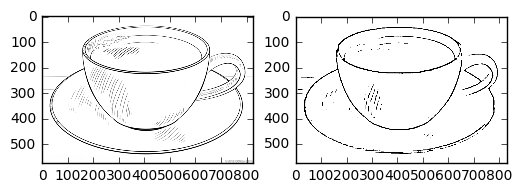

0.10 sec
----------------------------
save to ../own_dataset/test/pv_590_pred.png


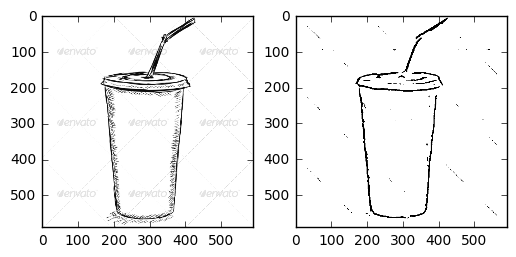

0.10 sec
----------------------------
save to ../own_dataset/test/p0000229687s0260t2_pred.png


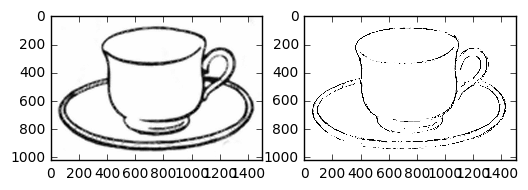

In [6]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
test_data=MyDataset(root, -1, 1,transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_data, batch_size=1)

idx = 0
for batch_x,name in test_loader:
    batch_x= Variable(batch_x).cuda()
    try:
        start = time()
        pred = model(batch_x)
        _,figs = plt.subplots(1,2)
        for i in range(len(batch_x)):
            print('%.2f sec'%(time()-start))
            print('----------------------------')
            img = (batch_x[i].cpu().data.numpy()*255)[0,:,:]
            predimg = (pred[i].cpu().data.numpy())[0,:,:]
            predimg[predimg>=0.5] = 1
            predimg[predimg<=0.9] = 0
            predimg = predimg*255
            figs[0].imshow(img,cmap = 'gray')
            figs[1].imshow(predimg,cmap = 'gray')

            print("save to " +root + name[i][:name[i].index('.')] +'_pred.png')

            pilimg = Image.fromarray(np.uint8(predimg))
            pilimg.save(root + name[i][:name[i].index('.')] +'_pred.png')

        plt.show()
        idx = idx+1
    except:
        print('Out of Memory: ' + name[0])
        continue